# 9장. 비지도 학습

https://nbviewer.jupyter.org/github/rickiepark/handson-ml2/tree/master/


이 코드의 내용은 Hands-On Machine Learning with Scikit-Learn & TensorFlow을 참고했음을 밝힙니다.

* 군집(clustering): 비슷한 샘플을 클러스터(cluster)로 모읍니다. 군집은 데이터 분석, 고객 분류, 추천 시스템, 검색 엔진, 이미지 분할, 준지도 학습, 차원 축소 등에 사용할 수 있는 훌륭한 도구입니다.
* 이상치 탐지(outlier detection): '정상' 데이터가 어떻게 보이는지를 학습합니다. 그다음 비정상 샘플을 감지하는 데 사용합니다. 예를 들면 제조 라인에서 결함 제품을 감지하거나 시계열 데이터에서 새로운 트렌드를 찾습니다.
* 밀도 추정(density estimation): 데이터셋 생성 확률 과정(random process)의 확률 밀도 함수(probaility density function, PDF)를 추정합니다. 밀도 추정은 이상치 탐지에 널리 사용됩니다. 밀돋가 매우 낮은 영역에 놓인 샘플이 이상치일 가능성이 높습니다. 또한 데이터 분석과 시각화에도 유용합니다.

# 군집

비슷한 샘플을 구별해 하나의 클러스터(cluster) 또는 비슷한 샘플의 그룹으로 할당하는 작업
> 아이디어: 같은 군집 내의 유사도는 크게, 다른 군집 내의 유사도는 작게

### 군집을 적용하는 다양한 애플리케이션

* 고객 분류<br>
고객을 구매 이력이나 웹사이트 내 행동 등을 기반으로 클러스터로 모을 수 있습니다. 이는 고객이 누구인지, 고객이 무엇을 원하는지 이해하는 데 도움이 됩니다. 고객 그룹마다 제품 추천이나 마케팅 전략을 다르게 적용할 수 있습니다. 예를 들어 동일한 클러스터 내의 사용자가 좋아하는 컨텐츠를 추천하는 추천 시스템(recommender system)을 만들 수 있습니다.<br>
<br>

* 데이터 분석<br>
새로운 데이터셋을 분석할 때 군집 알고리즘을 실행하고 각 클러스터를 따로 분석하면 도움이 됩니다.<br>
<br>

* 차원 축소 기법<br>
한 데이터셋에 군집 알고리즘을 적용하면 각 클러스터에 대한 샘플의 친화성(affinity)을 측정할 수 있습니다(친화성은 샘플이 클러스터에 얼마나 잘 맞는지를 측정합니다). 각 샘플의 특성 벡터 x는 클러스터 친화성의 벡터로 바꿀 수 있습니다. k개의 클러스터가 있다면 이 벡터는 k차원이 됩니다. 이 벡터는 일반적으로 원본 특성 벡터보다 훨씬 저차원입니다. 하지만 이후 분석을 위한 충분한 정보를 가질 수 있습니다.<br>
<br>

* 이상치 탐지<br>
모든 클러스터에 친화성이 낮은 샘플은 이상치일 가능성이 높습니다. 웹사이트 내 행동을 기반으로 사용자의 클러스터를 만들었다면 초당 웹서버 요청을 비정상적으로 많이 하는 사용자를 감지할 수 있습니다. 이상치 탐지는 특히 제조 분야에서 결함을 감지할 때 유용합니다. 또는 부정 거래 감지(fraud detection)에 활용됩니다.<br>
<br>

* 준지도 학습<br>
레이블된 샘플이 적다면 군집을 수행하고 동일한 클러스터에 있는 모든 샘플에 레이블을 전파할 수 있습니다. 이 기법은 이어지는 지도 학습 알고리즘에 필요한 레이블이 크게 증가해 성능을 크게 향상시킵니다.<br>
<br>

* 검색 엔진<br>
일부 검색 엔진은 제시된 이미지와 비슷한 이미지를 찾아줍니다. 이런 시스템을 구축하려면 먼저 데이터베이스에 있는 모든 이미지에 군집 알고리즘을 적용해야 합니다. 비슷한 이미지는 동일한 클러스터에 속합니다. 사용자가 찾으려는 이미지를 제공하면 훈련된 군집 모델을 사용해 이미지의 클러스터를 찾습니다. 그다음 이 클러스터의 모든 이미지를 반환합니다.<br>
<br>

* 이미지 분할<br>
색을 기반으로 픽셀을 클러스터로 모읍니다. 그다음 각 픽셀의 색을 해당 클러스터의 평균 색으로 바꿉니다. 이는 이미지에 있는 색상의 종류를 크게 줄입니다. 이렇게 하면 물체의 윤곽을 감지하기 쉬워져 물체 탐지 및 추적 시스템에서 이미지 분할을 많이 활용합니다.


### 1. k-평균

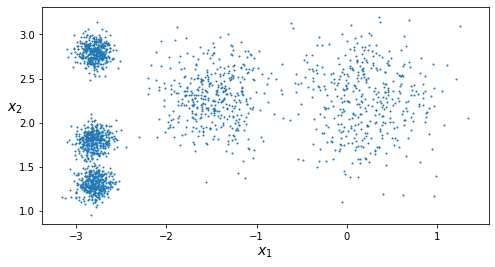

In [ ]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
# save_fig("blobs_plot")
plt.show()   

In [ ]:
# 각 클러스터의 중심을 찾고 가장 가까운 클러스터에 샘플을 할당합니다.
# 이 예에서는 데이터를 보고 k를 5로 지정해야 한다고 알 수 있지만 이는 일반적으로 쉬운 일이 아닙니다.

from sklearn.cluster import KMeans

k = 5   # 클러스터의 개수
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [ ]:
# 군집에서 각 샘플의 레이블(label)은 알고리즘이 샘플에 할당한 클러스터의 인덱스입니다.

y_pred

array([4, 1, 0, ..., 3, 0, 1], dtype=int32)

In [ ]:
# KMeans 클래스의 인스턴스는 lables_ 인스턴스 변수에 훈련된 샘플의 레이블을 가지고 있습니다.

y_pred is kmeans.labels_

True

In [ ]:
# 이 알고리즘이 찾은 센트로이드 다섯 개도 확인할 수 있습니다.

kmeans.cluster_centers_

array([[ 0.20876306,  2.25551336],
       [-2.80389616,  1.80117999],
       [-1.46679593,  2.28585348],
       [-2.79290307,  2.79641063],
       [-2.80037642,  1.30082566]])

In [ ]:
# 새로운 샘플에 가장 가까운 센트로이드의 클러스터를 할당할 수 있습니다.

X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([0, 0, 3, 3], dtype=int32)

<img src='https://i.imgur.com/GPIaPu0.png' width='100%'>

클러스터의 결정 경계를 그려보면 보로노이 다이어그램(Voronoi tessellation)을 얻을 수 있습니다(센트로이드는 x로 표시되어 있습니다).

k-평균 알고리즘은 클러스터의 크기가 많이 다르면 잘 작동하지 않습니다. 샘플을 클러스터에 할당할 때 센트로이드까지 거리를 고려하는 것이 전부이기 때문입니다.

* 하드 군집(hard clustering): 샘플을 하나의 클러스터에 할당
* 소프트 군집(soft clustering): 샘플에 점수(예를 들어 샘플과 센트로이드 사이의 거리, 가우시안 방사 기저 함수와 같은 유사도 점수(similarity score, 또는 친화성 점수))를 부여

In [ ]:
# 샘플과 각 센트로이드 사이의 거리를 반환
# X_new에 있는 첫 번째 샘플은 첫 번째 row에 해당하며, 각 column은 각 센트로이드를 의미한다.
# 고차원 데이터셋 --(soft clustering)--> k-차원 데이터셋
# 매우 효율적인 비선형 차원 축소 기법

kmeans.transform(X_new)

array([[0.32995317, 2.81093633, 1.49439034, 2.9042344 , 2.88633901],
       [2.80290755, 5.80730058, 4.4759332 , 5.84739223, 5.84236351],
       [3.29399768, 1.21475352, 1.69136631, 0.29040966, 1.71086031],
       [3.21806371, 0.72581411, 1.54808703, 0.36159148, 1.21567622]])

### k-평균 알고리즘

<img src='https://i.imgur.com/DUb4wSZ.png' width='100%'>

1. 센트로이드 랜덤 선정(예를 들어 무작위로 k개의 샘플을 뽑아 그 위치를 센트로이드로 가정)<br>
2. 샘플에 레이블을 할당<br>
3. 센트로이드를 업데이트<br>
4. 샘플에 변화가 없을 때까지 2번과 3번을 반복

* Hard Clustering
* 제한된 횟수 안에 수렴하는 것을 보장(샘플과 가장 가까운 센트로이드 사이의 평균 제곱 거리가 매 단계마다 작아질 수밖에 없기 때문)
* 이 알고리즘의 계산 복잡도는 일반적으로 샘플 개수 m, 클러스터 개수 k, 차원 개수 n에 선형적입니다. 하지만 데이터가 군집할 수 있는 구조를 가질 때입니다. 그렇지 않으면 최악의 경우 계산 복잡도는 샘플 개수가 지수적으로 급격히 증가할 수 있습니다. 실제로 이런 일은 드뭅니다. 일반적으로 k-평균은 가장 빠른 군집 알고리즘 중 하나입니다.
* 이 알고리즘이 수렴하는 것이 보장되지만 적절한 솔루션으로 수렴하지 못할 수 있습니다(즉 지역 최적점으로 수렴할 수 있습니다). 이 여부는 센트로이드 초기화에 달려 있습니다.
* 데이터셋이 원형의 형태임을 가정(타원형, 비선형 등의 데이터셋에 약하다)

<img src='https://i.imgur.com/ciYarDK.png' width='100%'>

<운 나쁜 센트로이드 초기화 때문에 만들어진 최적이 아닌 솔루션>

### 센트로이드 초기화 방법

In [ ]:
# 센트로이드 위치를 근사하게 알 수 있다면(예를 들어 또 다른 군집 알고리즘을 먼저 실행) 아래와 같이 수행
# 사이킷런은 fit() 메서드를 호출할 때 전체 알고리즘을 n_init번 실행 후 최선의 솔루션을 반환
# --> 최선의 솔루션에 대한 성능 지표는 "이니셔(inertia)"
# --> KMeans 클래스는 알고리즘을 n_init번 실행하여 이너셔가 가장 낮은 모델을 반환

good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)    # n_init: 랜덤 초기화 횟수(default=10)

* 이니셔(inertia, ==L2 norm): 각 샘플과 가장 가까운 센트로이드 사이의 평균 제곱 거리 --> 군집화에 사용하는 성능 지표

In [ ]:
kmeans.inertia_

211.5985372581684

In [ ]:
# 예측기의 socre() 메서드는 사이킷런의 '큰 값이 좋은 것이다' 라는 규칙을 따라야 하기 때문에 이너셔의 음숫값을 반환

kmeans.score(X)

-211.59853725816856

### k-평균++ 알고리즘

* 다른 센트로이드와 거리가 먼 센트로이드를 선택하는 초기화 단계 적용
* k-평균 알고리즘이 최적이 아닌 솔루션으로 수렴할 가능성을 크게 낮춥니다.
* 최적의 솔루션을 찾기 위해 실행할 알고리즘 반복 횟수를 크게 줄일 수 있습니다.

<img src='https://i.imgur.com/5ZHqvUD.png' width='100%'>

Kmeans 클래스는 기본적으로 이 초기화 방법을 사용합니다. 원래 방식을 사용하고 싶다면(즉 k개의 샘플을 랜덤하게 선택하여 초기 센트로이드로 지정하고 싶다면) init 매개변수를 'random'으로 지정합니다. 그러나 이렇게 할 필요성은 거의 없을 것입니다.

### k-평균 속도 개선과 미니배치 k-평균

* 전체 데이터셋을 사용해 반복하지 않고 이 알고리즘은 각 반복마다 미니배치를 사용해 센트로이드를 조금씩 이동합니다.
* 이는 일반적으로 알고리즘의 속도를 3배에서 4배 정도 높입니다.
* 또한 메모리에 들어가지 않는 대량의 데이터셋에 군집 알고리즘을 적용할 수 있습니다.
* 미니배치 k-평균 알고리즘이 일반 k-평균 알고리즘보다 훨씬 빠르지만 이너셔는 일반적으로 조금 더 나쁩니다.

<img src='https://i.imgur.com/bsMjfX9.png' width='100%'>

In [ ]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

### 최적의 클러스터 개수 찾기

<img src='https://i.imgur.com/DFYIFHa.png' width='100%'>

k가 너무 작으면 별개의 클러스터를 합치고(왼쪽), k가 너무 크면 하나의 클러스터가 여러 개로 나뉩니다(오른쪽).

최적의 클러스터의 개수를 찾는 방법으로 가장 작은 이너셔를 가진 모델을 선택하면 다음과 같은 문제점이 발생합니다. k=3일 때 이너셔는 653.2이고 이는 k=5일 때(211.6)보다 높습니다. 하지만 k=8일 때 이너셔는 119.1입니다. 이너셔는 k가 증가함에 따라 점점 작아지므로 k를 선택할 때 좋은 성능 지표가 아닙니다. 실제로 클러스터가 늘어날수록 각 샘플은 가까운 센트로이드에 더 가깝게 됩니다. 따라서 이너셔는 더 작아질 것입니다.

이너셔를 k의 함수로 그래프를 그려본다면?

<img src='https://i.imgur.com/4JNyn9N.png' width='100%'>

k에 대한 정답을 모른다면 4는 좋은 선택이 됩니다. 이보다 작은 값은 변화가 심하고 더 큰 값은 크게 도움이 되지 않습니다. 어쩌면 완벽한 클러스터를 아무 이유 없이 반으로 나누었는지 모릅니다. 하지만 이 방법은 너무 엉성합니다.

실루엣 점수(silhouette score)

* 최선의 클러스터 개수를 선택하는 더 정확한 방법
* 모든 샘플에 대한 실루엣 계수(silhouette coefficient)의 평균
* 샘플의 실루엣 계수는 (b-a)/max(a,b)로 계산
* a는 동일한 클러스터에 있는 다른 샘플까지 평균 거리(즉 클러스터 내부의 평균 거리)
* b는 가장 가까운 클러스터까지의 평균 거리(즉 가장 가까운 클러스터의 샘플까지 평균 거리, 샘플과 가장 가까운 클러스터는 자신이 속한 클러스터는 제외하고 b가 최소인 클러스터입니다)
* -1 <= (실루엣 계수) <= 1
* 실루엣 계수가 +1에 가까우면 자신의 클러스터 안에 잘 속해 있고 다른 클러스터와는 멀리 떨어져 있다.
* 실루엣 계수가 0에 가까우면 클러스터 경계에 위치한다.
* 실루엣 계수가 -1에 가까우면 이 샘플이 잘못된 클러스터에 할당되었다.
* 계산 비용이 많이 드는 방법

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.655517642572828

<img src='https://i.imgur.com/mAxqOrm.png' width='100%'>

실루엣 다이어그램(silhouette diagram)

* 모든 샘플의 실루엣 계수를 할당된 클러스터와 계숫값으로 정렬하여 그리면 더 많은 정보가 있는 그래프를 얻을 수 있습니다.
* 이 그래프의 높이는 클러스터가 포함하고 있는 샘플의 개수를 의미하고 너비는 이 클러스터에 포함된 샘플의 정렬된 실루엣 계수를 나타냅니다(넓을수록 좋습니다).
* 수직 파선은 각 클러스터 개수에 해당하는 실루엣 점수를 나타냅니다.
* 한 클러스터의 샘플 대부분이 이 점수보다 낮은 계수를 가지면(즉 많은 샘플이 파선의 왼쪽에서 멈추면) 클러스터의 샘플이 다른 클러스터랑 너무 가깝다는 것을 의미하므로 나쁜 클러스터입니다.

<img src='https://i.imgur.com/9GlDkqo.png' width='100%'>

k=4나 k=5일 때는 클러스터가 상당히 좋아 보입니다. 대부분의 샘플이 파선을 넘어서 뻗어 있고 1.0에 근접해 있습니다. k=4일 때 인덱스 1의(위에서부터 세 번째) 클러스터가 매우 큽니다. k=5일 때는 모든 클러스터의 크기가 비슷합니다. 따라서 k=4일 때 전반적인 실루엣 점수가 k=5보다 조금 높더라도 비슷한 크기의 클러스터를 얻을 수 있는 k=5를 선택하는 것이 좋습니다.

### 2. k-평균의 한계

* 최적이 아닌 솔루션을 피하려면 알고리즘을 여러 번 실행해야 합니다.
* 클러스터 개수를 지정해야 합니다.
* 클러스터의 크기나 밀집도가 서로 다르거나 원형이 아닐 경우 잘 작동하지 않습니다. --> 가우시안 혼합 모델이 잘 작동합니다.
* 따라서 k-평균을 실행하기 전에 입력 특성의 스케일을 맞추는 것이 중요합니다. 그렇지 않으면 클러스터가 길쭉해지고 k-평균의 결과가 좋지 않습니다. 특성의 스케일을 맞추어도 모든 클러스터가 잘 구분되고 원형의 형태를 가진다고 보장할 수는 없지만 일반적으로 더 좋아집니다.

### 3. 군집을 사용한 이미지 분할

* 이미지 분할(image segmentation):이미지를 세그먼트(segment) 여러 개로 분할하는 작업
* 시맨틱 분할(semantic segmentation): 동일한 종류의 물체에 속한 모든 픽셀은 같은 세그먼트에 할당
* 색상 분할(color segmentation): 동일한 색상을 가진 픽셀을 같은 세그먼트에 할당

In [ ]:
# 무당벌레 이미지를 다운로드합니다

import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
filename = "ladybug.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, filename)

('ladybug.png', <http.client.HTTPMessage at 0x7fa51961a860>)

In [ ]:
!ls

ladybug.png  sample_data


In [ ]:
from matplotlib.image import imread    # or 'from imageio import imread'
image = imread('ladybug.png')
image.shape    # (높이, 너비, 컬러 채널 개수(RGB)), 0과 1 사이

(533, 800, 3)

In [ ]:
# RGB 색상의 긴 리스트로 변환한 다음 k-평균을 사용해 이 색상을 클러스터로 모읍니다.

X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [ ]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

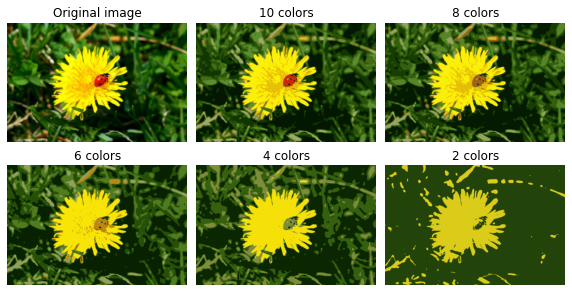

In [ ]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

# save_fig('image_segmentation_diagram', tight_layout=False)
plt.show()

### 4. 군집을 사용한 전처리

In [ ]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
log_reg.score(X_test, y_test)

0.9555555555555556

In [ ]:
# k-평균을 전처리 단계로 사용하는 방법

from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=50, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=42,
                        tol=0.0001, verbose=0)),
                ('log_reg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=5000,
                                    multi_class='ovr', n_jobs=None,
                                    penalty='l2', random_state=42,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [ ]:
pipeline.score(X_test, y_test)

0.9733333333333334

In [ ]:
# GridSearchCV를 사용해 최적의 클러스터 개수 탐색

from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.2s
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ............................. kmeans__n_clusters=2, total=   0.2s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.2s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.3s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.2s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.3s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.3s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.3s
[CV] kmeans__n_clusters=4 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done 294 out of 294 | elapsed: 22.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kmeans',
                                        KMeans(algorithm='auto', copy_x=True,
                                               init='k-means++', max_iter=300,
                                               n_clusters=50, n_init=10,
                                               n_jobs=None,
                                               precompute_distances='auto',
                                               random_state=42, tol=0.0001,
                                               verbose=0)),
                                       ('log_reg',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                      

In [ ]:
# 최선의 k값과 파이프라인의 성능

grid_clf.best_params_

{'kmeans__n_clusters': 97}

In [ ]:
grid_clf.score(X_test, y_test)

0.9733333333333334

### 5. 군집을 사용한 준지도 학습

레이블이 없는 데이터가 많고 레이블이 있는 데이터는 적을 때 사용

In [ ]:
# 숫자 데이터셋에서 레이블된 샘플이 50개밖에 없다면?

n_labels = 50
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)
log_reg.fit(X_train[:n_labels], y_train[:n_labels])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
log_reg.score(X_test, y_test)

0.84

In [ ]:
# 훈련 세트를 50개의 클러스터로 모읍니다.
# 그다음 각 클러스터에서 센트로이드에 가장 가까운 이미지를 찾습니다.
# 이런 이미지를 대표 이미지(representative image)라고 부릅니다.

k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

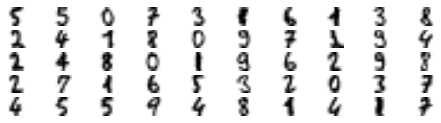

In [ ]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

# save_fig("representative_images_diagram", tight_layout=False)
plt.show()

In [ ]:
# 이미지를 보고 수동으로 레이블을 할당

y_representative_digits = np.array([
    5, 5, 0, 7, 3, 8, 6, 1, 3, 8,
    2, 4, 1, 8, 0 ,9, 7, 1, 3, 4,
    2, 4, 8, 0, 1, 9, 6, 2, 9, 8,
    2, 7, 1, 6, 5, 3, 2, 0, 3, 7,
    4, 5, 5, 9, 4, 8, 1, 4, 1, 7])

In [ ]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8533333333333334

샘플에 레이블을 부여하는 것은 비용이 많이 들고 어렵습니다. 특히 전문가가 수동으로 처리해야 할 때 그렇습니다. 따라서 무작위 샘플 대신 대표 샘플에 레이블을 할당하는 것이 좋은 방법입니다.

### 레이블 전파(labelpropagation)

대표 이미지에 대한 레이블을 동일한 클러스터에 있는 모든 샘플로 전파하는 방법

In [ ]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [ ]:
# 문제점: 각 대표 샘플의 레이블을 동일한 클러스터의 모든 샘플에 전파
# 여기에는 클러스터 경계에 가깝게 위치한 샘플이 포함되어 있고 아마 잘못 레이블이 부여되었을 것입니다.

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.8911111111111111

In [ ]:
# 부분적으로 전파
# 센트로이드와 가까운 샘플의 20%에만 레이블을 전파하는 방법

percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [ ]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.8644444444444445

### 능동 학습(active learning)

전문가가 학습 알고리즘과 상호작용하여 알고리즘이 요청할 때 특정 샘플의 레이블을 제공하는 방법<br>
ex) 불확실성 샘플링 등

**불확실성 샘플링(uncertainty sampling)**<br>
<br>

1. 지금까지 수집한 레이블된 샘플에서 모델을 훈련합니다. 이 모델을 사용해 레이블되지않은 모든 샘플에 대한 예측을 만듭니다.
2. 모델이 가장 불확실하게 예측한 샘플(즉 추정 확률이 낮은 샘플)을 전문가에게 보내 레이블을 붙입니다.
3. 레이블을 부여하는 노력만큼의 성능이 향상되지 않을 때까지 이를 반복합니다.

다른 전략은 모델을 가장 크게 바꾸는 샘플이나 모델의 검증 점수를 가장 크게 떨어뜨리는 샘플, 여러 개의 모델(예를 들면 SVM이나 랜덤 포레스트)이 동일한 예측을 내지 않는 샘플에 대해 레이블을 요청하는 것입니다.

### 6. DBSCAN

밀집된 연속적 지역을 클러스터로 정의하는 방법으로, 모든 클러스터가 충분히 밀집되어 있고 밀집되지 않은 지역과 잘 구분될 때 좋은 성능을 냅니다.

* 알고리즘이 각 샘플에서 작은 거리인 e(입실론) 내에 샘플이 몇 개 놓여 있는지 셉니다. 이 지역을 샘플의 e-이웃(e-neighborhood)이라고 부릅니다.
* (자기 자신을 포함해) e-이웃 내에 적어도 min_samples개 샘플이 있다면 이를 핵심 샘플(core instance)로 간주합니다. 즉 핵심 샘플은 밀집된 지역에 있는 샘플입니다.
* 핵심 샘플의 이웃에 있는 모든 샘플은 동일한 클러스터에 속합니다. 이웃에는 다른 핵심 샘플이 포함될 수 있습니다. 따라서 핵심 샘플의 이웃의 이웃은 계속해서 하나의 클러스터를 형성합니다.
* 핵심 샘플이 아니고 이웃도 아닌 샘플은 이상치로 판단합니다.

In [66]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [67]:
# 일부 샘플의 클러스터 인덱스는 -1입니다.
# 이는 알고리즘이 이 샘플을 이상치로 판단했다는 의미입니다.

dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5])

In [68]:
# 핵심 샘플의 인덱스는 인스턴스 변수 core_sample_indices_에서 확인할 수 있습니다.
len(dbscan.core_sample_indices_)

808

In [69]:
dbscan.core_sample_indices_[:10]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13])

In [70]:
# 핵심 샘플 자체는 인스턴스 변수 components_에 저장되어 있습니다.
dbscan.components_[:3]

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599]])

<img src='https://i.imgur.com/FOIEIEO.png' width='100%'>

두가지 다른 이웃 반경을 사용한 DBSCAN 군집

### 7. 다른 군집 알고리즘

* 병합 군집
* BIRCH
* 평균-이동
* 유사도 전파
* 스펙트럼 군집

# 가우시안 혼합

### 가우시안 혼합 모델(Gaussian mixture model, GMM)

샘플이 파라미터가 알려지지 않은 여러 개의 혼합된 가우시안 분포에서 생성되었다고 가정하는 확률 모델

(...skip...)

# 연습문제

**1. 군집을 어떻게 정의할 수 있나요? 몇 개의 군집 알고리즘을 말해보세요.**<br>
<br>
머신러닝에서 군집은 비슷한 샘플을 모으는 비지도 작업입니다. 유사도 개념은 주어진 문제에 따라 다릅니다. 예를 들어 어떤 경우에는 가까이 있는 두 샘플은 비슷하다고 생각할 수 있지만 다른 경우에는 조밀하게 모여 있는 그룹에 같이 속해 있는 한 멀리 떨어진 샘플도 비슷하다고 볼 수 있습니다. k-평균, DBSCAN, 병합 군집, BIRCH, 평균-이동, 유사도 전파, 스펙트럼 군집 등이 인기가 많은 군집 알고리즘입니다.

**2. 군집 알고리즘의 주요 애플리케이션은 무엇인가요?**<br>
<br>
군집 알고리즘의 주요 애플리케이션은 데이터 분석, 고객 분류, 추천 시스템, 검색 엔진, 이미지 분할, 준지도 학습, 차원 축소, 이상치 탐지, 특이치 탐지 등입니다.

**3. k-평균을 사용할 때 적절한 클러스터 개수를 선택할 수 있는 두 가지 기법을 설명하세요.**<br>
<br>
k-평균을 사용할 때 클러스터 개수를 선택하는 간단한 방법은 엘보 규칙입니다. 클러스터 개수의 함수로 이너셔(각 샘플과 인접한 센트로이드 사이의 평균 제곱 거리)를 그리고 그래프에서 이너셔가 더는 빠르게 감소하지 않는 지점(엘보)을 찾습니다. 일반적으로 이 지점이 최적의 클러스터 개수에 가깝습니다. 다른 방법으로는 클러스터 개수의 함수로 실루엣 점수를 그래프로 그립니다. 그래프에 뾰족하게 올라간 지점이 나타나는 경우가 많은데 일반적으로 이 근처가 최적의 클러스터 개수입니다. 실루엣 점수는 모든 샘플에 대한 평균 실루엣 계수입니다. 샘플이 자신의 클러스터 안에 잘 속해 있고 다른 클러스터와 멀리 떨어져 있으면 +1에 가깝고 다른 클러스터에 매우 인접해 있으면 -1에 가까워집니다. 실루엣 다이어그램을 그려 좀 더 많은 분석을 수행할 수 있습니다.

**4. 레이블 전파는 무엇인가요? 왜 이를 구현해야 하고 어떻게 구현할 수 있나요?**<br>
<br>
데이터셋에 레이블을 부여하는 것은 비용과 시간이 많이 듭니다. 따라서 보통 레이블이 없는 샘플은 많고 레이블이 있는 샘플은 적습니다. 레이블 전파는 레이블이 있는 샘플의 일부(또는 전부)를 레이블이 없는 비슷한 샘플에 복사하는 기법입니다. 레이블을 가진 샘플의 개수를 크게 늘릴 수 있고 지도 학습 방법을 사용해 더 나은 성능을 낼 수 있습니다(이것이 준지도 학습 방법입니다). 이를 구현하는 한 가지 방법은 k-평균과 같은 군집 알고리즘을 모든 샘플에 적용한 다음 군집마다 가장 많은 레이블이나 가장 대표적인 샘플(즉 센트로이드에 가장 가까운 샘플)을 찾아 동일 클러스터 안에 있는 레이블이 없는 샘플에 전파하는 것입니다.

**5. 대규모 데이터셋으로 확장할 수 있는 군집 알고리즘 두 개를 말해보세요. 밀도가 높은 지역을 찾는 군집 알고리즘 두 개는 무엇인가요?**<br>
<br>
k-평균과 BIRCH를 대규모 데이터셋에 적용할 수 있습니다. DBSCAN과 평균-이동이 밀도가 높은 지역을 찾습니다.

**6. 능동 학습이 유용한 경우는 언제인가요? 어떻게 구현할 수 있나요?**<br>
<br>
레이블이 없는 샘플이 많고 레이블을 부여하는 것에 비용이 많이 들 때는 능동 학습이 유용합니다. 이런 (매우 흔한) 경우에는 무작위로 샘플을 선택해 레이블을 부여하는 것보다 능동 학습이 더 바람직합니다. 전문가가 학습 알고리즘과 상호작용하여 알고리즘이 요청하는 특정 샘플에 레이블을 제공합니다. 널리 사용하는 것은 불확실성 샘플링입니다.

**7. 이상치 탐지와 정상치 탐지의 차이는 무엇인가요?**<br>
<br>
많은 사람들이 이상치 탐지와 특이치 탐지 두 용어를 혼용하여 사용합니다. 하지만 둘이 완전히 같은 것은 아닙니다. 이상치탐지는 이상치가 포함될 수 있는 데이터셋에서 알고리즘을 훈련합니다. 이상치 탐지의 목표는 전형적으로 (훈련 세트 안에 있는) 이상치와 새로운 샘플 사이에 있는 이상치를 구별해내는 것입니다. 특이치 탐지에서는 '깨끗'하다고 가정한 데이터셋에서 알고리즘을 훈련합니다. 이 알고리즘의 목적은 새로운 샘플 사이에서 특이한 것을 감지하는 것입니다. 어떤 알고리즘(예를 들어 아이솔레이션 포레스트)은 이상치 탐지에 최적인 반면 다른 알고리즘(예를 들어 one-class SVM)은 특이치 탐지에 잘 맞습니다.

**8. 가우시안 혼합이 무엇인가요? 어떤 작업에 사용할 수 있나요?**<br>
<br>
가우시안 혼합 모델(GMM)은 샘플이 파라미터를 모르는 몇 개의 가우시안 분포에서 생성되었다고 가정하는 확률 모델입니다. 다른 말로 하면 데이터가유한한 개수의 타원 모양 클러스터로 그룹지어 있다는 가정입니다(클러스터의 타원 모양, 크기, 방향, 밀집도는 다를 수 있습니다). 하지만 샘플이 어떤 클러스터에 속해 있는지는 알지 못합니다. 밀집도 추정, 군집, 이상치 탐지에이 모델을 사용할 수 있습니다.

(...skip...)